In [ ]:
#pip install textblob


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
import nltk



In [2]:
# Load your dataset
file_path = r'C:\Users\yassi\Documents\Business intelligence\LAB_4\osha.xlsx'
data = pd.read_excel(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\juh\\OneDrive - Högskolan Dalarna\\Desktop\\BI labs\\Labs_juh24\\osha.xlsx'

In [3]:
# Assuming your dataset's relevant text is in the third column
text_column_name = data.columns[1]  # Adjust this if your text data is in a different column
text_data = data[text_column_name].astype(str)

# Basic text preprocessing
#nltk.download('punkt')
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

preprocessed_text = []
for text in text_data:
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens if word.isalpha()]  # Keep only alphabetic tokens
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [stemmer.stem(word) for word in tokens]
    preprocessed_text.append(' '.join(tokens))




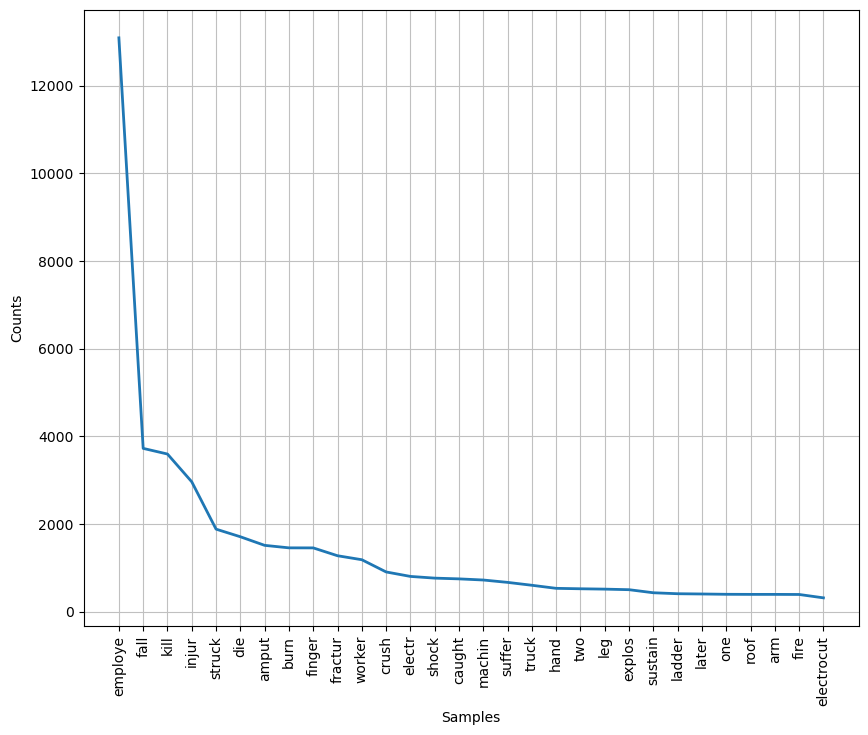

In [4]:
# Frequency distribution of words after preprocessing
all_words = ' '.join(preprocessed_text)
all_tokens = word_tokenize(all_words)
fdist = FreqDist(all_tokens)

# Plot the most common words
plt.figure(figsize=(10, 8))
fdist.plot(30, cumulative=False)
plt.show()

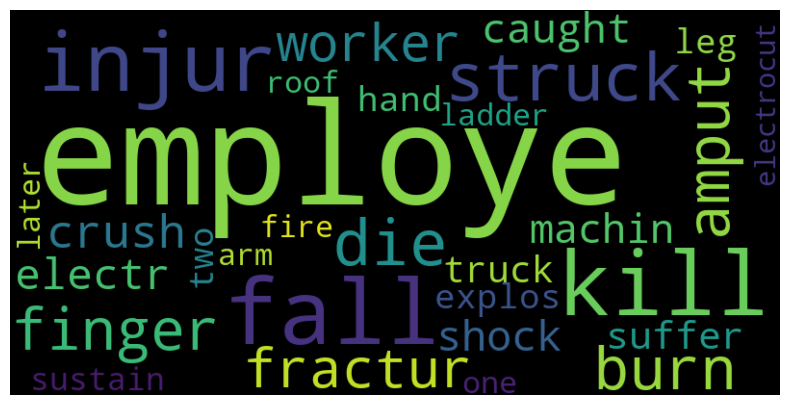

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming fdist is already created and contains the frequency distribution of the words

# Get the top 15 words and their counts
top_15_words_dict = dict(fdist.most_common(30))

# Generate a word cloud for the top 30words
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(top_15_words_dict)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [6]:


# Assuming you have a DataFrame named 'data' and descriptions are in the second column
descriptions = data.iloc[:, 1].astype(str)

# Define a function to get sentiment
def get_sentiment_scores(texts):
    sentiment_scores = []
    for text in texts:
        analysis = TextBlob(text)
        sentiment_score = analysis.sentiment.polarity  # Returns a float between -1.0 and 1.0
        sentiment_scores.append(sentiment_score)
    return sentiment_scores

# Get sentiment scores and add them to the DataFrame
data['Sentiment'] = get_sentiment_scores(descriptions)

# Print sentiment scores for each description
def print_sentiment_scores(data):
    for i, row in data.iterrows():
        print(f"Description {i+1}: Sentiment Score = {row['Sentiment']}")

print_sentiment_scores(data)

# Describe the sentiment scores
sentiment_summary = data['Sentiment'].describe()

# Print the summary statistics
print("Summary Statistics for Sentiment Scores:")
print(sentiment_summary)

# Calculate and print additional statistics not included in describe()
median = data['Sentiment'].median()
print(f"Median: {median}")

# Calculating interquartile range (IQR) as an example of custom statistics
q1 = data['Sentiment'].quantile(0.25)
q3 = data['Sentiment'].quantile(0.75)
iqr = q3 - q1
print(f"Interquartile Range (IQR): {iqr}")

Description 1: Sentiment Score = 0.0
Description 2: Sentiment Score = -0.2
Description 3: Sentiment Score = -0.2
Description 4: Sentiment Score = 0.25
Description 5: Sentiment Score = -0.6
Description 6: Sentiment Score = 0.0
Description 7: Sentiment Score = -0.1
Description 8: Sentiment Score = 0.0
Description 9: Sentiment Score = -0.6
Description 10: Sentiment Score = 0.0
Description 11: Sentiment Score = 0.0
Description 12: Sentiment Score = 0.0
Description 13: Sentiment Score = 0.0
Description 14: Sentiment Score = 0.0
Description 15: Sentiment Score = 0.0
Description 16: Sentiment Score = -0.2318181818181818
Description 17: Sentiment Score = -0.1
Description 18: Sentiment Score = 0.0
Description 19: Sentiment Score = 0.0
Description 20: Sentiment Score = 0.0
Description 21: Sentiment Score = 0.0
Description 22: Sentiment Score = 0.0
Description 23: Sentiment Score = -0.3
Description 24: Sentiment Score = 0.0
Description 25: Sentiment Score = 0.0
Description 26: Sentiment Score = 0

Description 1880: Sentiment Score = -1.0
Description 1881: Sentiment Score = -0.2
Description 1882: Sentiment Score = -1.0
Description 1883: Sentiment Score = 0.0
Description 1884: Sentiment Score = -0.2
Description 1885: Sentiment Score = -0.5
Description 1886: Sentiment Score = 0.0
Description 1887: Sentiment Score = 0.0
Description 1888: Sentiment Score = -0.2
Description 1889: Sentiment Score = -0.1
Description 1890: Sentiment Score = -0.2
Description 1891: Sentiment Score = 0.0
Description 1892: Sentiment Score = 0.15
Description 1893: Sentiment Score = 0.0
Description 1894: Sentiment Score = 0.0
Description 1895: Sentiment Score = -0.2
Description 1896: Sentiment Score = -0.2
Description 1897: Sentiment Score = -0.2
Description 1898: Sentiment Score = -0.35
Description 1899: Sentiment Score = -0.2
Description 1900: Sentiment Score = 0.0
Description 1901: Sentiment Score = -0.2
Description 1902: Sentiment Score = -0.2
Description 1903: Sentiment Score = 0.0
Description 1904: Senti

Description 4116: Sentiment Score = 0.0
Description 4117: Sentiment Score = 0.0
Description 4118: Sentiment Score = 0.0
Description 4119: Sentiment Score = 0.0
Description 4120: Sentiment Score = 0.0
Description 4121: Sentiment Score = 0.0
Description 4122: Sentiment Score = 0.0
Description 4123: Sentiment Score = -0.2
Description 4124: Sentiment Score = 0.0
Description 4125: Sentiment Score = 0.0
Description 4126: Sentiment Score = 0.0
Description 4127: Sentiment Score = 0.0
Description 4128: Sentiment Score = 0.0
Description 4129: Sentiment Score = -0.2
Description 4130: Sentiment Score = 0.0
Description 4131: Sentiment Score = 0.0
Description 4132: Sentiment Score = 0.0
Description 4133: Sentiment Score = 0.0
Description 4134: Sentiment Score = 0.0
Description 4135: Sentiment Score = -0.2
Description 4136: Sentiment Score = 0.0
Description 4137: Sentiment Score = 0.0
Description 4138: Sentiment Score = 0.0
Description 4139: Sentiment Score = 0.0
Description 4140: Sentiment Score = 0

Description 6376: Sentiment Score = 0.0
Description 6377: Sentiment Score = 0.25
Description 6378: Sentiment Score = -0.2
Description 6379: Sentiment Score = -0.05
Description 6380: Sentiment Score = 0.0
Description 6381: Sentiment Score = -0.6
Description 6382: Sentiment Score = -0.2
Description 6383: Sentiment Score = 0.0
Description 6384: Sentiment Score = -0.2
Description 6385: Sentiment Score = -0.6
Description 6386: Sentiment Score = 0.0
Description 6387: Sentiment Score = 0.0
Description 6388: Sentiment Score = 0.0
Description 6389: Sentiment Score = 0.0
Description 6390: Sentiment Score = 0.0
Description 6391: Sentiment Score = 0.0
Description 6392: Sentiment Score = 0.0
Description 6393: Sentiment Score = -0.2
Description 6394: Sentiment Score = -0.44999999999999996
Description 6395: Sentiment Score = 0.0
Description 6396: Sentiment Score = 0.0
Description 6397: Sentiment Score = 0.0
Description 6398: Sentiment Score = 0.0
Description 6399: Sentiment Score = 0.0
Description 64

Description 8584: Sentiment Score = -0.2
Description 8585: Sentiment Score = 0.0
Description 8586: Sentiment Score = 0.5
Description 8587: Sentiment Score = -0.2
Description 8588: Sentiment Score = -0.2
Description 8589: Sentiment Score = -0.2
Description 8590: Sentiment Score = 0.0
Description 8591: Sentiment Score = -0.2
Description 8592: Sentiment Score = 0.0
Description 8593: Sentiment Score = -0.2
Description 8594: Sentiment Score = -0.2
Description 8595: Sentiment Score = -0.2
Description 8596: Sentiment Score = -0.2
Description 8597: Sentiment Score = -0.2
Description 8598: Sentiment Score = -0.2
Description 8599: Sentiment Score = -0.2
Description 8600: Sentiment Score = 0.0
Description 8601: Sentiment Score = 0.0
Description 8602: Sentiment Score = -0.2
Description 8603: Sentiment Score = 0.0
Description 8604: Sentiment Score = -0.1
Description 8605: Sentiment Score = 0.0
Description 8606: Sentiment Score = -0.1
Description 8607: Sentiment Score = -0.2
Description 8608: Sentim

Description 10895: Sentiment Score = 0.0
Description 10896: Sentiment Score = 0.0
Description 10897: Sentiment Score = 0.0
Description 10898: Sentiment Score = 0.0
Description 10899: Sentiment Score = 0.0
Description 10900: Sentiment Score = 0.0
Description 10901: Sentiment Score = 0.0
Description 10902: Sentiment Score = 0.0
Description 10903: Sentiment Score = -0.3
Description 10904: Sentiment Score = -0.2
Description 10905: Sentiment Score = 0.0
Description 10906: Sentiment Score = 0.0
Description 10907: Sentiment Score = -0.1
Description 10908: Sentiment Score = -0.2
Description 10909: Sentiment Score = -0.15555555555555559
Description 10910: Sentiment Score = -0.2
Description 10911: Sentiment Score = -0.2
Description 10912: Sentiment Score = -0.020000000000000004
Description 10913: Sentiment Score = 0.0
Description 10914: Sentiment Score = 0.0
Description 10915: Sentiment Score = 0.0
Description 10916: Sentiment Score = 0.45
Description 10917: Sentiment Score = 0.0
Description 109

Description 13326: Sentiment Score = 0.0
Description 13327: Sentiment Score = 0.0
Description 13328: Sentiment Score = -0.2
Description 13329: Sentiment Score = -0.2
Description 13330: Sentiment Score = 0.0
Description 13331: Sentiment Score = 0.0
Description 13332: Sentiment Score = 0.0
Description 13333: Sentiment Score = 0.0
Description 13334: Sentiment Score = 0.0
Description 13335: Sentiment Score = 0.0
Description 13336: Sentiment Score = 0.0
Description 13337: Sentiment Score = -0.2
Description 13338: Sentiment Score = 0.0
Description 13339: Sentiment Score = 0.0
Description 13340: Sentiment Score = -0.2
Description 13341: Sentiment Score = 0.0
Description 13342: Sentiment Score = 0.0
Description 13343: Sentiment Score = 0.0
Description 13344: Sentiment Score = 0.0
Description 13345: Sentiment Score = 0.0
Description 13346: Sentiment Score = -0.5
Description 13347: Sentiment Score = -0.2
Description 13348: Sentiment Score = -0.2
Description 13349: Sentiment Score = 0.0
Descripti

Description 15385: Sentiment Score = 0.0
Description 15386: Sentiment Score = 0.0
Description 15387: Sentiment Score = 0.0
Description 15388: Sentiment Score = -0.2
Description 15389: Sentiment Score = 0.0
Description 15390: Sentiment Score = 0.0
Description 15391: Sentiment Score = 0.0
Description 15392: Sentiment Score = 0.0
Description 15393: Sentiment Score = 0.0
Description 15394: Sentiment Score = -0.2
Description 15395: Sentiment Score = 0.0
Description 15396: Sentiment Score = -0.2
Description 15397: Sentiment Score = 0.0
Description 15398: Sentiment Score = 0.0
Description 15399: Sentiment Score = -0.2
Description 15400: Sentiment Score = 0.0
Description 15401: Sentiment Score = 0.0
Description 15402: Sentiment Score = -0.2
Description 15403: Sentiment Score = 0.0
Description 15404: Sentiment Score = 0.0
Description 15405: Sentiment Score = 0.0
Description 15406: Sentiment Score = 0.25
Description 15407: Sentiment Score = 0.0
Description 15408: Sentiment Score = 0.0
Descriptio

In [1]:
# Sentiment score thresholds based on earlier simulation or actual analysis
q25_threshold = data['Sentiment'].quantile(0.25)
median_threshold = data['Sentiment'].median()
q75_threshold = data['Sentiment'].quantile(0.75)

# Filter data based on sentiment score
data_q25 = data[data['Sentiment'] <= q25_threshold]
data_median = data[(data['Sentiment'] > q25_threshold) & (data['Sentiment'] <= q75_threshold)]
data_q75 = data[data['Sentiment'] > q75_threshold]

stop_words = set(stopwords.words('english'))

def get_top_words(texts):
    all_words = ' '.join(texts).lower()
    tokens = word_tokenize(all_words)
    words = [word for word in tokens if word.isalpha() and word not in stop_words]
    fdist = FreqDist(words)
    return dict(fdist.most_common(5))

# Generate top words for each sentiment category using the second column
top_words_q25 = get_top_words(data_q25.iloc[:, 1].astype(str))
top_words_median = get_top_words(data_median.iloc[:, 1].astype(str))
top_words_q75 = get_top_words(data_q75.iloc[:, 1].astype(str))

# Function to generate word clouds
def generate_wordcloud(words_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Generate and show word clouds for each category
generate_wordcloud(top_words_q25, 'Top 10 Words - Negative')
generate_wordcloud(top_words_median, 'Top 10 Words - Neutral')
generate_wordcloud(top_words_q75, 'Top 10 Words - Positive')

NameError: name 'data' is not defined